In [127]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
import glob
import pandas as pd

files = glob.glob("TRAIN/*.csv")
dfs = [pd.read_csv(f) for f in files]
#print(dfs)
dfTrain = pd.concat(dfs,ignore_index=True)

In [129]:
dfTrain.head()

,timestamp,accX,accY,accZ,class
0,90380.0,1807,2267,1857,5
1,90381.0,1803,2267,1853,5
2,90382.0,1801,2265,1854,5
3,90383.0,1796,2264,1855,5
4,90384.0,1803,2269,1854,5


In [130]:
files = glob.glob("TEST/*.csv")
dfs = [pd.read_csv(f) for f in files]
#print(dfs)
dfTest = pd.concat(dfs,ignore_index=True)

In [131]:
dfTest.head()

,timestamp,accX,accY,accZ,class
0,73200.0,1915,2359,1940,5
1,73201.0,1913,2352,1946,5
2,73202.0,1913,2349,1939,5
3,73203.0,1907,2353,1943,5
4,73204.0,1915,2347,1942,5


In [100]:
#dfTrain.drop(['timestamp'] , axis = 1 , inplace = True)

In [132]:
dfTrain.head()

,timestamp,accX,accY,accZ,class
0,90380.0,1807,2267,1857,5
1,90381.0,1803,2267,1853,5
2,90382.0,1801,2265,1854,5
3,90383.0,1796,2264,1855,5
4,90384.0,1803,2269,1854,5


In [102]:
#dfTest.drop(['timestamp'] , axis = 1 , inplace = True)

In [133]:
dfTest.head()

,timestamp,accX,accY,accZ,class
0,73200.0,1915,2359,1940,5
1,73201.0,1913,2352,1946,5
2,73202.0,1913,2349,1939,5
3,73203.0,1907,2353,1943,5
4,73204.0,1915,2347,1942,5


In [134]:
dfTrain.columns

Index(['timestamp', 'accX', 'accY', 'accZ', 'class'], dtype='object')

In [135]:
dfTrain.shape

(1238406, 5)

In [136]:
dfTest.shape

(684771, 5)

In [137]:
print(dfTrain['class'].unique())
print("----------------------------------------")
print(dfTrain['class'].value_counts())

[5 1 6 4 3 2 7]
----------------------------------------
1    426645
7    342354
4    232079
3    142965
5     34995
6     31563
2     27805
Name: class, dtype: int64


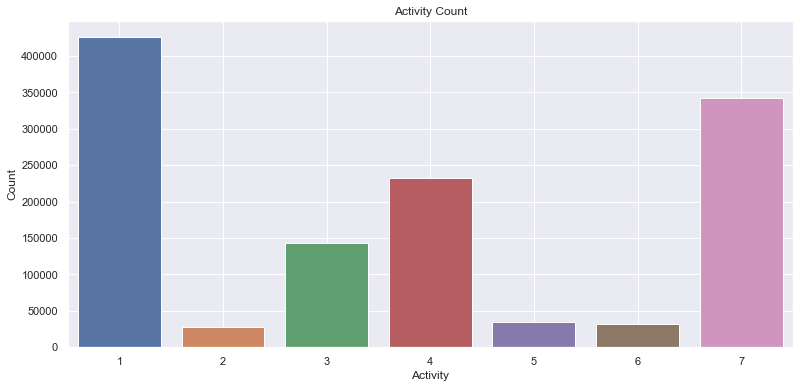

In [108]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "class" , data = dfTrain)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

In [138]:
print(dfTrain.shape, dfTest.shape)

(1238406, 5) (684771, 5)


In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dfTrain.iloc[:,0:4])
mat_train = scaler.transform(dfTrain.iloc[:,0:4])
print(mat_train)

[[0.5420415  0.43006204 0.55338383 0.45334636]
 [0.5420475  0.42893401 0.55338383 0.45236932]
 [0.5420535  0.42836999 0.55289519 0.45261358]
 ...
 [0.62642437 0.49548787 0.57341803 0.5       ]
 [0.62642437 0.49492386 0.57366235 0.49951148]
 [0.62642437 0.49746193 0.57292939 0.49926722]]


In [140]:
scaler = MinMaxScaler()
scaler.fit(dfTest.iloc[:,0:4])
mat_test = scaler.transform(dfTest.iloc[:,0:4])
print(mat_test)

[[0.45046154 0.32437772 0.57600196 0.47360704]
 [0.45046769 0.32358751 0.5742913  0.47507331]
 [0.45047385 0.32358751 0.57355816 0.47336266]
 ...
 [0.98461538 0.32121691 0.57453568 0.49755621]
 [0.98461538 0.3180561  0.5742913  0.50048876]
 [0.98461538 0.32003161 0.57478006 0.49633431]]


In [141]:
temp = []
for i in dfTrain['class']:
    if i == 1: temp.append(0)
    if i == 2: temp.append(1)
    if i == 3: temp.append(2)
    if i == 4: temp.append(3)
    if i == 5: temp.append(4)
    if i == 6: temp.append(5)
    if i == 7: temp.append(6)
dfTrain["n_Activity"] = temp

In [142]:
temp = []
for i in dfTest['class']:
    if i == 1: temp.append(0)
    if i == 2: temp.append(1)
    if i == 3: temp.append(2)
    if i == 4: temp.append(3)
    if i == 5: temp.append(4)
    if i == 6: temp.append(5)
    if i == 7: temp.append(6)
dfTest["n_Activity"] = temp

In [143]:
dfTrain.drop(["class"] , axis = 1 , inplace = True)

In [144]:
dfTest.drop(["class"] , axis = 1 , inplace = True)

In [145]:
print(dfTrain.shape, dfTest.shape)

(1238406, 5) (684771, 5)


In [146]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(dfTrain.n_Activity , num_classes=7)
y_test = to_categorical(dfTest.n_Activity , num_classes=7)

In [147]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [148]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [149]:
X_train = mat_train 
X_test = mat_test

In [150]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(1238406, 4) (1238406, 7)
(684771, 4) (684771, 7)


In [151]:
filepath="HARXYZ_weights.hdf5"
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [152]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam
#from tensorflow.keras.utils import np_utils

In [155]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_21 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                6304      
_________________________________________________________________
dense_23 (Dense)             (None, 7)                

In [156]:
history = model.fit(X_train, y_train , epochs=22 , batch_size = 128 , validation_data=(X_test, y_test) , callbacks=[checkpoint,lr_reduce])

Epoch 1/22
9676/9676 [==============================] - 16s 2ms/step - loss: 0.3152 - accuracy: 0.8844 - val_loss: 2.6482 - val_accuracy: 0.6727

Epoch 00001: val_accuracy improved from -inf to 0.67272, saving model to HARXYZ_weights.hdf5
Epoch 2/22
9676/9676 [==============================] - 16s 2ms/step - loss: 0.2152 - accuracy: 0.9187 - val_loss: 3.2354 - val_accuracy: 0.6557

Epoch 00002: val_accuracy did not improve from 0.67272

Epoch 00002: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
Epoch 3/22
9676/9676 [==============================] - 16s 2ms/step - loss: 0.1702 - accuracy: 0.9376 - val_loss: 3.7686 - val_accuracy: 0.6407

Epoch 00003: val_accuracy did not improve from 0.67272

Epoch 00003: ReduceLROnPlateau reducing learning rate to 5.000000237487257e-06.
Epoch 4/22
9676/9676 [==============================] - 16s 2ms/step - loss: 0.1638 - accuracy: 0.9404 - val_loss: 3.6917 - val_accuracy: 0.6479

Epoch 00004: val_accuracy did not improve from 0.6

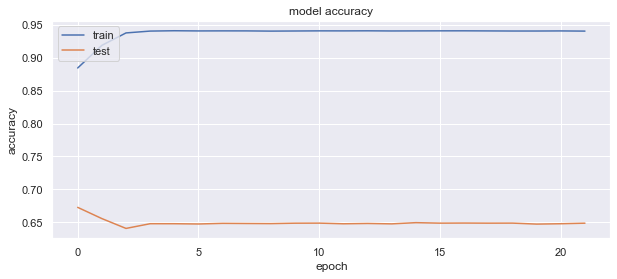

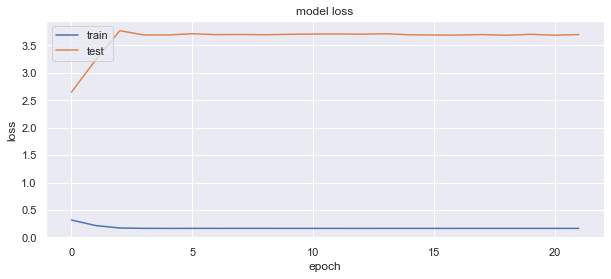

In [157]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [158]:
from sklearn.metrics import confusion_matrix
model.load_weights("HARXYZ_weights.hdf5")
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

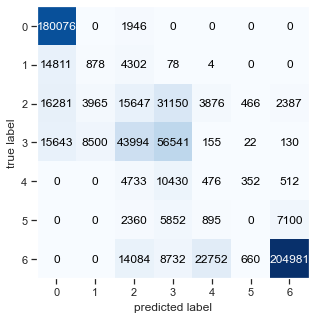

In [159]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 5))
plt.show()

In [160]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88    182022
           1       0.07      0.04      0.05     20073
           2       0.18      0.21      0.19     73772
           3       0.50      0.45      0.48    124985
           4       0.02      0.03      0.02     16503
           5       0.00      0.00      0.00     16207
           6       0.95      0.82      0.88    251209

    accuracy                           0.67    684771
   macro avg       0.36      0.36      0.36    684771
weighted avg       0.67      0.67      0.67    684771



In [162]:
d = { "Index":np.arange(684771) , "Activity":pred }
final = pd.DataFrame(d)
final.to_csv( 'human_activity_predictionsXYZ.csv' , index = False)